# Bayesian Data Analysis - Part II MCMC

Import statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

## Part I: Coin Flipping

We now use the pymc package to redo the coin-tossing problem of the previous notebook, this time using MCMC sampling.

#### Uniform Prior + Coin Flipping

Using a starting sample size of 32 and a uniform prior, we can plot the posterior distribution for the probability of flipping heads for various chain lengths. As the chain length increases, the sampled distribution becomes more and more accurate to the actual posterior.

In [145]:
SIZES = np.array([1, 10, 100, 1000, 10000])
CHAINS = np.array([1, 2, 4, 8, 16])

STARTING_SIZE = 32

def generate_coin_flips(size):
    flips = np.random.rand(size)
    return np.sum(flips >= 0.5)

# Generate initial data
observed_heads = generate_coin_flips(STARTING_SIZE)
print(observed_heads)

16


Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 10 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)
C:\Users\savar\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\savar\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:422: UserWarning: Attempting to set identical left == right == <xarray.DataArray 'draw' ()>
array(0) results in singular transformations; automatically expanding.
  ax.set_xlim(left=data.draw.min(), right=data.draw.max())




n=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.517  0.022   0.502    0.533        NaN      NaN   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       NaN       NaN    NaN  


n=10
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.509  0.063   0.438     0.62       0.02    0.014   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads      11.0      22.0   1.18  


n=100
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.491  0.085   0.362    0.655      0.008    0.006   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     108.0     161.0    1.0  


n=1000
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.501  0.084   0.343    0.657      0.003    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of H

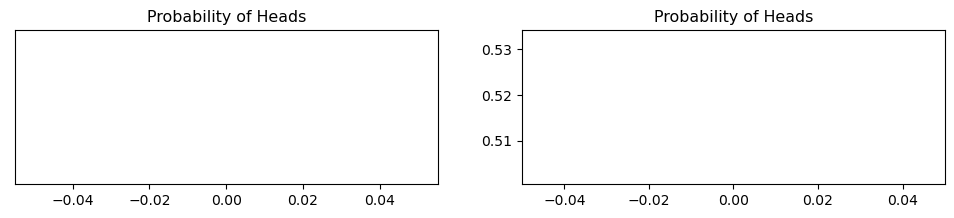

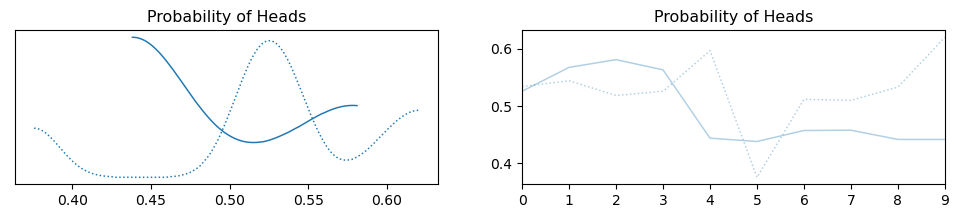

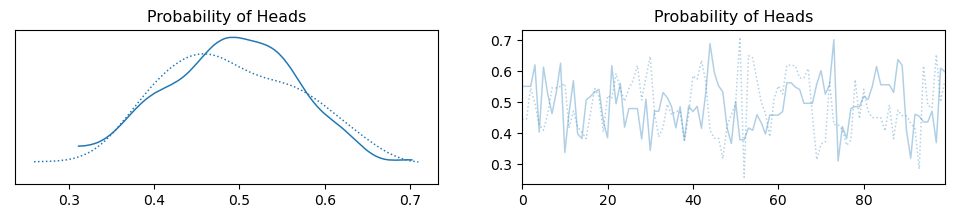

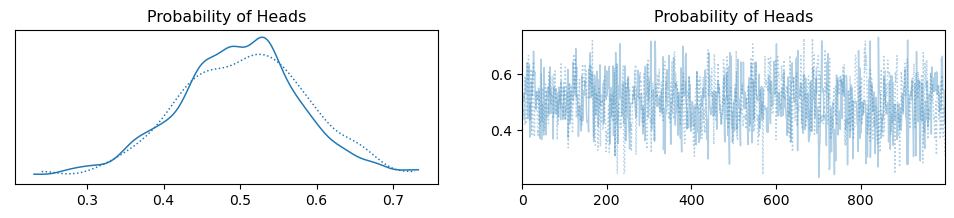

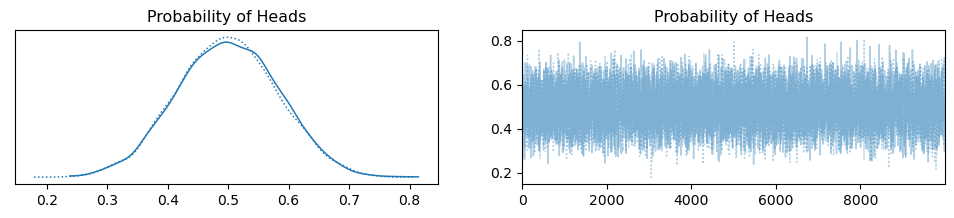

In [146]:
def plot_uniform_mcmc_heads_posterior(observed_heads, plot_variable, parameters):
    # Create a PyMC model
    model = pm.Model()
    
    with model:
        # Define uniform prior
        p = pm.Uniform('Probability of Heads', lower=0, upper=1)
            
        # Define bionmial likelihood
        likelihoods = pm.Binomial('y', n=STARTING_SIZE, p=p, observed=observed_heads)
        
        traces = []
        
        if plot_variable == 'size':
            for size in parameters:
                traces.append(pm.sample(size, tune=1000, chains=2))
        elif plot_variable == 'chains':
            for chain in parameters:
                traces.append(pm.sample(1000, tune=1000, chains=chain))
    
    for i in range(0, len(parameters)):
        print('\n')
        if plot_variable == 'size':
            print(f'n={parameters[i]}')
        elif plot_variable == 'chains':
            print(f'chains={parameters[i]}')
        print(pm.summary(traces[i]))
        pm.plot_trace(traces[i])
    
    del model

plot_uniform_mcmc_heads_posterior(observed_heads, 'size', SIZES)

We can also analyze the behavior of the sampled posterior traces as we change the number of chains. As shown below, as the number of chains increases, the average of the posteriors becomes more accurate to the actual posterior.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Probability of Heads]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 38 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 76 seconds.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)




chains=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.494  0.083   0.342    0.645      0.005    0.003   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     305.0     602.0    NaN  


chains=2
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.501  0.084   0.344    0.658      0.003    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     916.0    1334.0   1.01  


chains=4
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads   0.5  0.085   0.339    0.657      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads    1718.0    2559.0    1.0  


chains=8
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads   0.5  0.085    0.34    0.656      0.001    0.001   

                      ess_bulk  ess_tail  r_hat  
Probab

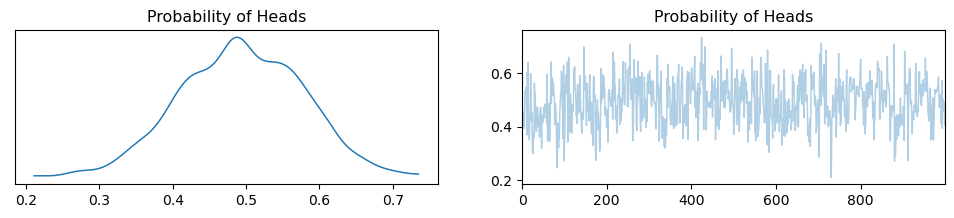

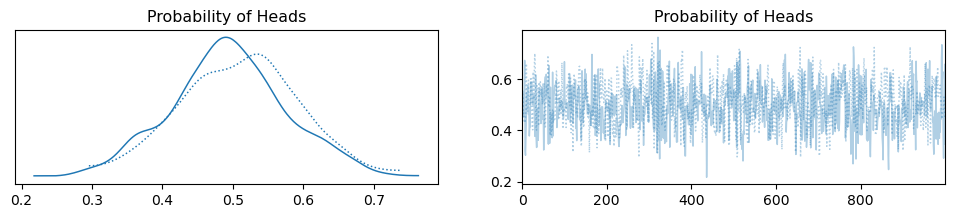

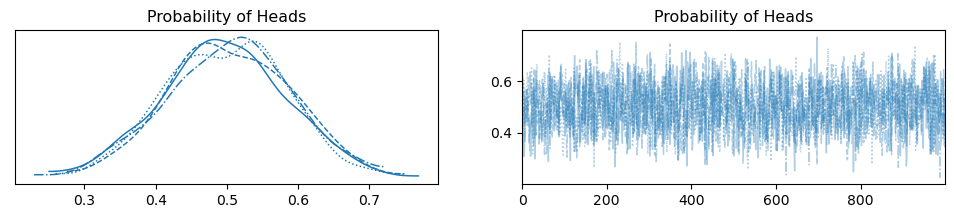

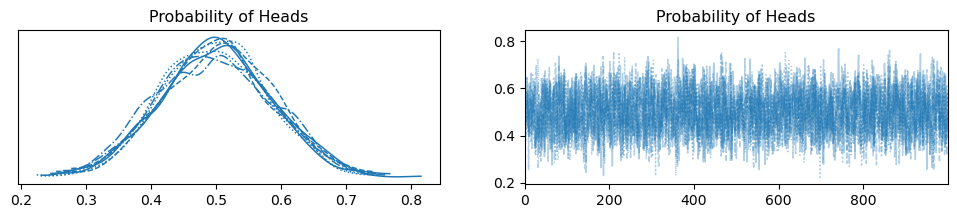

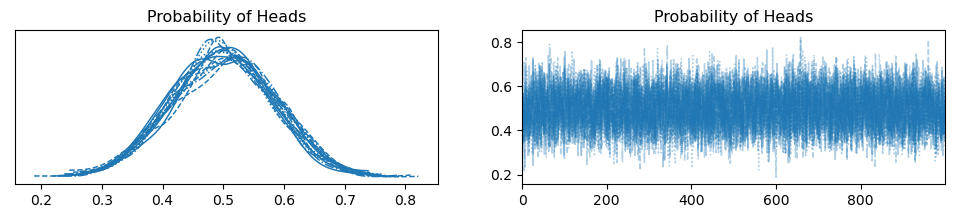

In [147]:
plot_uniform_mcmc_heads_posterior(observed_heads, 'chains', CHAINS)

#### Normal Prior + Coin Flipping

We can also analyze the behavior of coin flipping when a normal prior is used. In this first example, we use a normal distribution centered at 0.5 and vary the chain length to show the convergence of the posterior distribution.

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 9 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)
C:\Users\savar\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\savar\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:422: UserWarning: Attempting to set identical left == right == <xarray.DataArray 'draw' ()>
array(0) results in singular transformations; automatically expanding.
  ax.set_xlim(left=data.draw.min(), right=data.draw.max())




n=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.567  0.011   0.559    0.574        NaN      NaN   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       NaN       NaN    NaN  


n=10
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.496  0.064   0.384    0.548      0.021    0.015   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       9.0      22.0   1.44  


n=100
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.513  0.054   0.427     0.61      0.006    0.004   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads      96.0      92.0   1.06  


n=1000
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.499  0.066   0.379    0.623      0.002    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of H

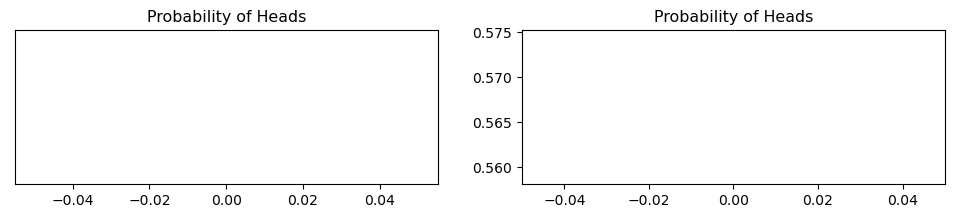

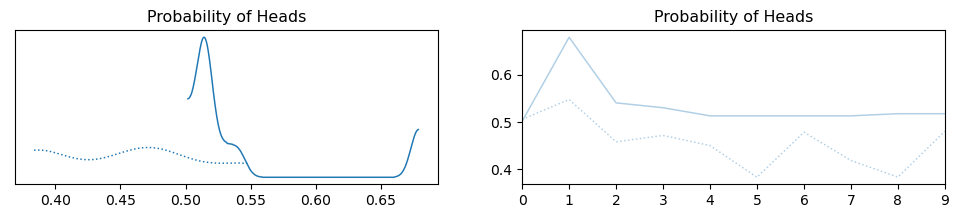

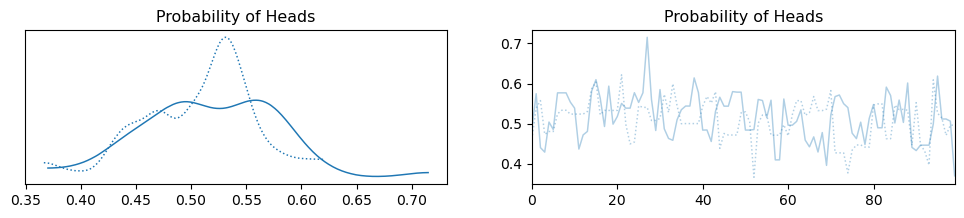

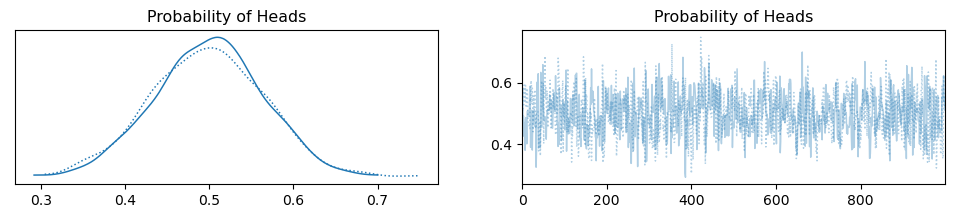

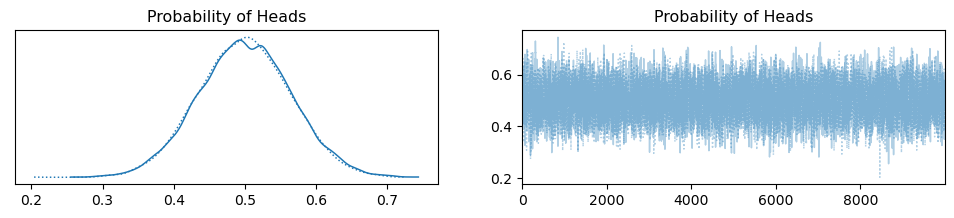

In [148]:
def plot_normal_mcmc_heads_posterior(observed_heads, plot_variable, parameters, mu, sigma):
    # Create a PyMC model
    model = pm.Model()
    
    with model:
        # Define uniform prior
        p = pm.Normal('Probability of Heads', mu=mu, sigma=sigma)
            
        # Define bionmial likelihood
        likelihoods = pm.Binomial('y', n=STARTING_SIZE, p=p, observed=observed_heads)
        
        traces = []
        
        if plot_variable == 'size':
            for size in parameters:
                traces.append(pm.sample(size, tune=1000, chains=2))
        elif plot_variable == 'chains':
            for chain in parameters:
                traces.append(pm.sample(1000, tune=1000, chains=chain))
    
    for i in range(0, len(parameters)):
        print('\n')
        if plot_variable == 'size':
            print(f'n={parameters[i]}')
        elif plot_variable == 'chains':
            print(f'chains={parameters[i]}')
        print(pm.summary(traces[i]))
        az.plot_trace(traces[i])
    
    del model

plot_normal_mcmc_heads_posterior(observed_heads, 'size', SIZES, 0.5, 0.1)

If we vary the chain length instead, we can see how the different chains converge to the same distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Probability of Heads]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 40 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 79 seconds.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)




chains=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.496  0.066   0.369    0.611      0.003    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     376.0     725.0    NaN  


chains=2
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads   0.5  0.064   0.378    0.615      0.002    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     913.0    1464.0    1.0  


chains=4
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.499  0.066   0.373    0.617      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads    1722.0    2742.0    1.0  


chains=8
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.499  0.065   0.375    0.619      0.001    0.001   

                      ess_bulk  ess_tail  r_hat  
Prob

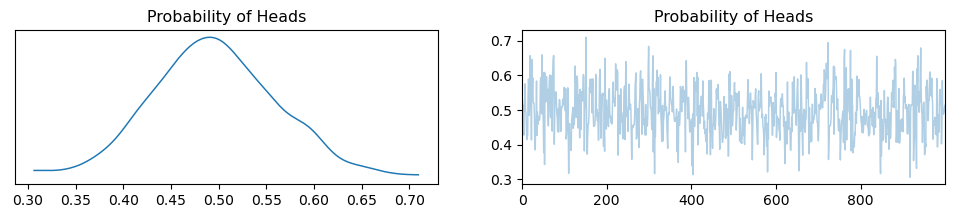

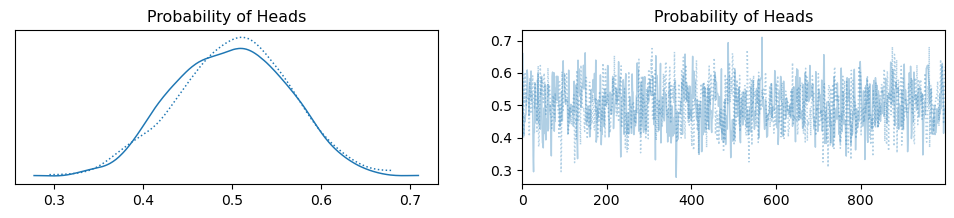

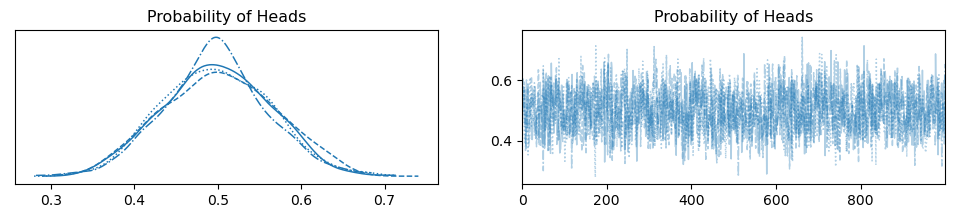

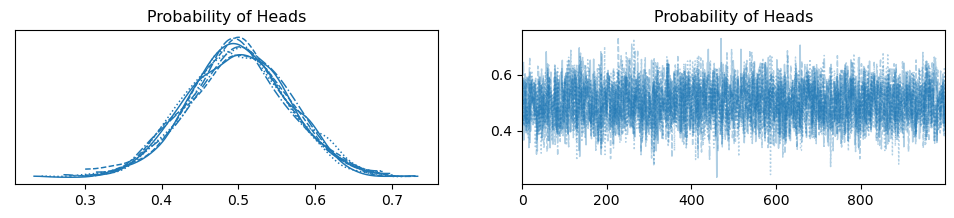

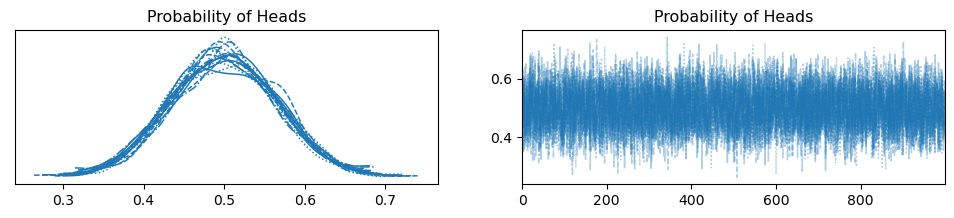

In [149]:
plot_normal_mcmc_heads_posterior(observed_heads, 'chains', CHAINS, 0.5, 0.1)

We can also study the effects of a biased prior by shifting the mean from 0.5. In this instance, we have shifted $\mu$ one standard deviation below its previous bias value to 0.4. If we vary the chain lengths, we have the following:

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 10 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)
C:\Users\savar\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\savar\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:422: UserWarning: Attempting to set identical left == right == <xarray.DataArray 'draw' ()>
array(0) results in singular transformations; automatically expanding.
  ax.set_xlim(left=data.draw.min(), right=data.draw.max())




n=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.543  0.016   0.532    0.554        NaN      NaN   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       NaN       NaN    NaN  


n=10
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.451  0.073    0.32    0.569      0.014     0.01   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads      26.0      22.0   1.07  


n=100
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.447  0.068   0.346    0.602      0.007    0.005   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     104.0     149.0    1.0  


n=1000
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.46  0.065   0.334    0.575      0.002    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Hea

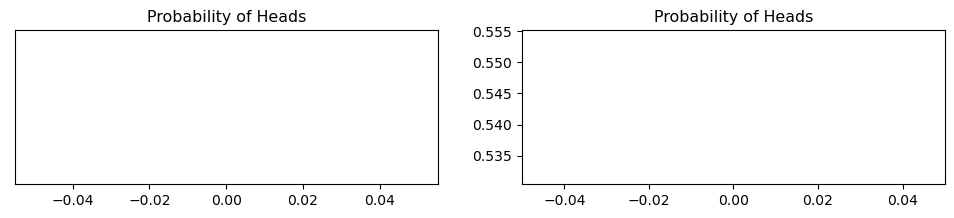

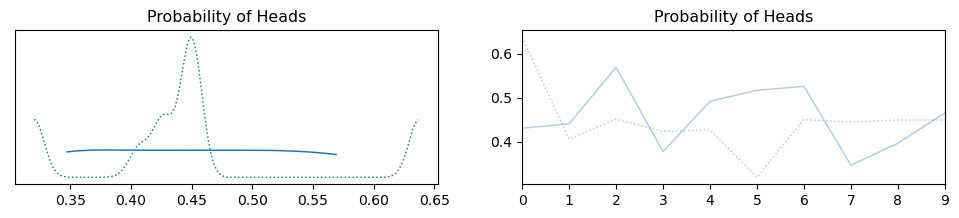

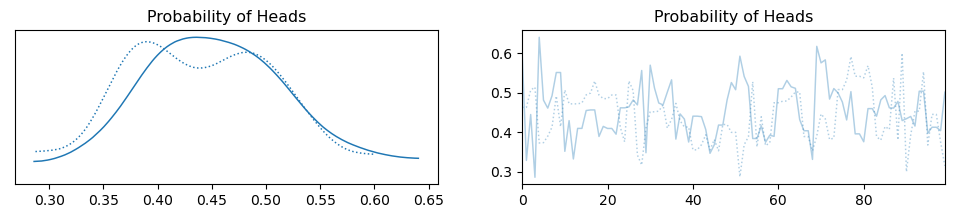

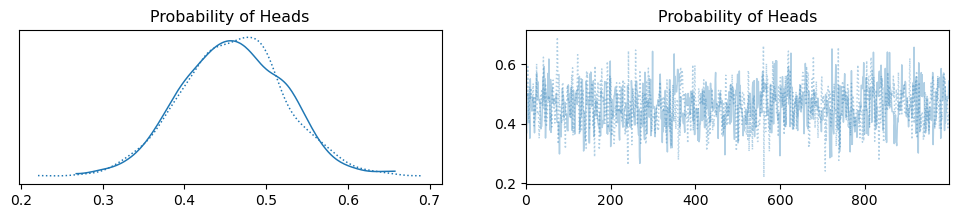

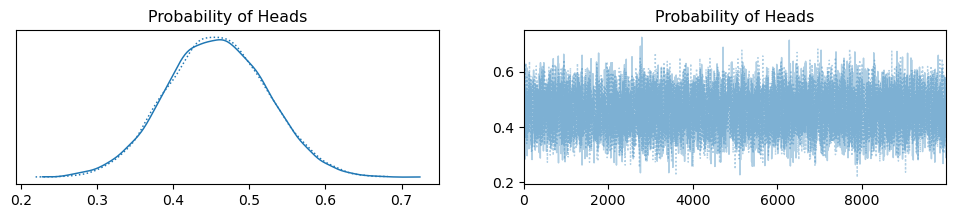

In [150]:
plot_normal_mcmc_heads_posterior(observed_heads, 'size', SIZES, 0.4, 0.1)

Here are the distributions for varying numbers of chains.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Probability of Heads]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 39 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 77 seconds.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)




chains=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.456  0.066   0.331    0.578      0.003    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     413.0     706.0    NaN  


chains=2
                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.46  0.065   0.336    0.577      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     943.0    1256.0    1.0  


chains=4
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.457  0.065   0.339     0.58      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads    1693.0    2772.0    1.0  


chains=8
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.458  0.065   0.334    0.579      0.001    0.001   

                      ess_bulk  ess_tail  r_hat  
Prob

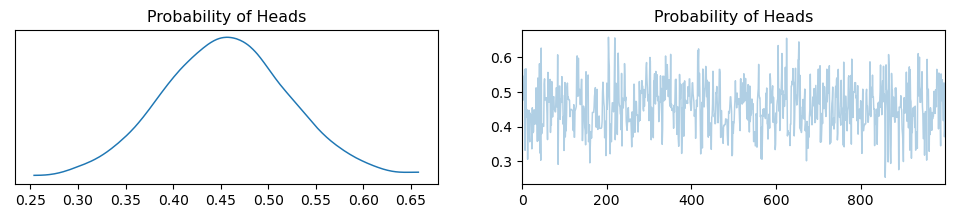

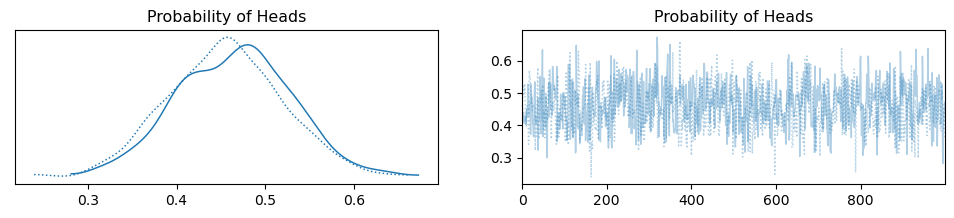

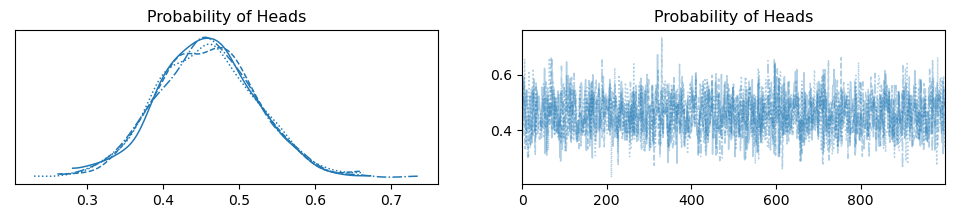

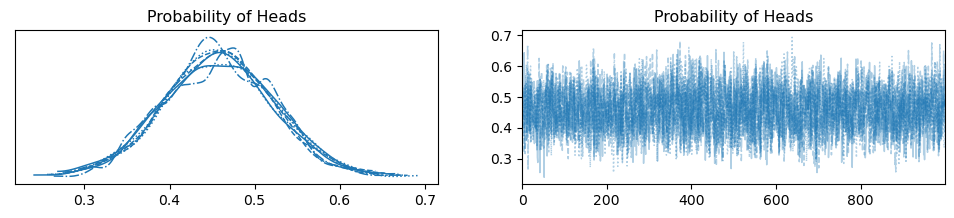

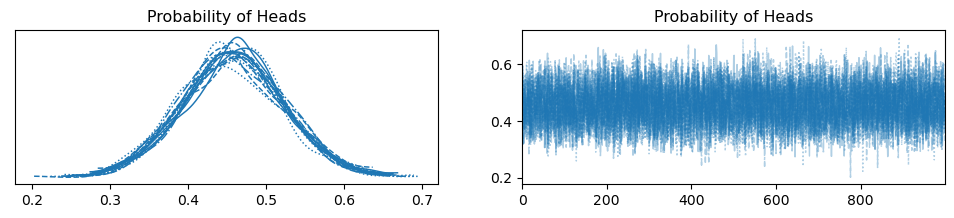

In [151]:
plot_normal_mcmc_heads_posterior(observed_heads, 'chains', CHAINS, 0.4, 0.1)

For this example, we chose a bias that was 3 standard deviations above the mean, 0.8. The distributions with respect to different chain lengths look as follows:

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 10 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)
C:\Users\savar\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\savar\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:422: UserWarning: Attempting to set identical left == right == <xarray.DataArray 'draw' ()>
array(0) results in singular transformations; automatically expanding.
  ax.set_xlim(left=data.draw.min(), right=data.draw.max())




n=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.611  0.105   0.537    0.685        NaN      NaN   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       NaN       NaN    NaN  


n=10
                       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.636  0.07   0.519    0.738      0.024    0.018   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads       9.0      22.0   1.33  


n=100
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.627  0.061   0.528    0.745      0.006    0.004   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     101.0     131.0    1.0  


n=1000
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.624  0.059   0.511    0.736      0.002    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Hea

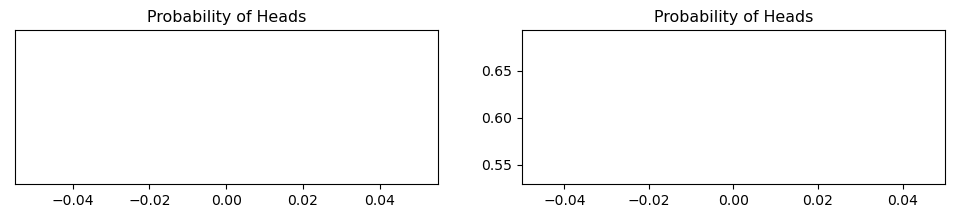

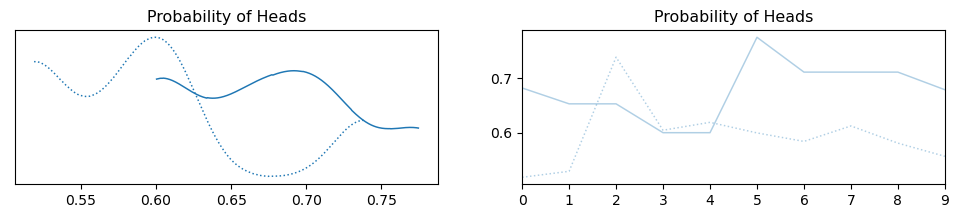

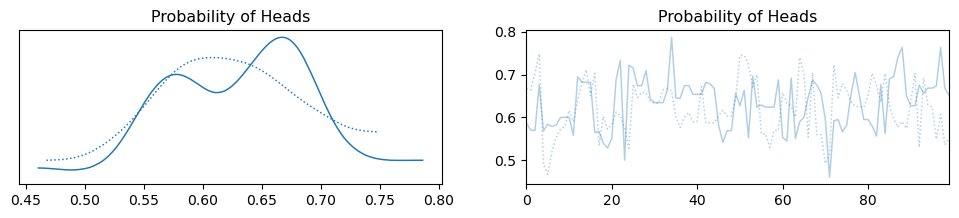

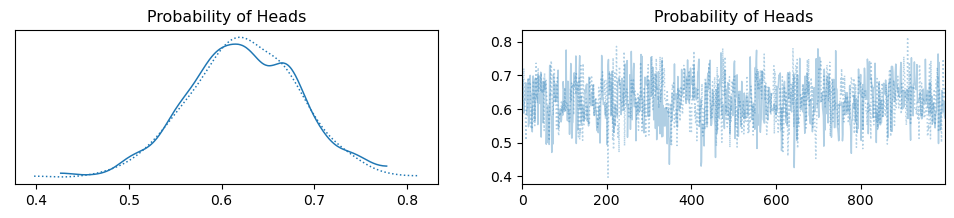

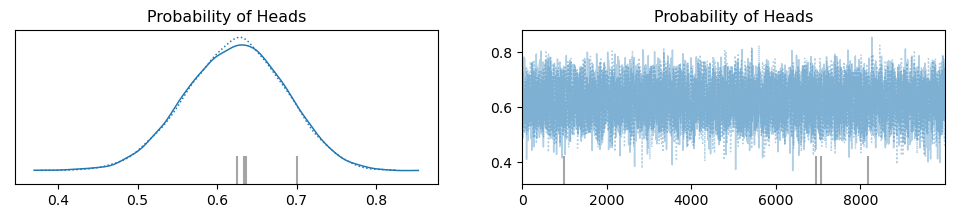

In [152]:
plot_normal_mcmc_heads_posterior(observed_heads, 'size', SIZES, 0.8, 0.1)

Here are the distributions for different numbers of chains.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Probability of Heads]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 41 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 4 jobs)
NUTS: [Probability of Heads]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 77 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)




chains=1
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.626  0.062   0.526    0.762      0.003    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     512.0     696.0    NaN  


chains=2
                       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.625  0.06    0.52    0.745      0.002    0.002   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads     748.0    1293.0    1.0  


chains=4
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.621  0.062   0.507    0.737      0.001    0.001   

                      ess_bulk  ess_tail  r_hat  
Probability of Heads    1741.0    2683.0    1.0  


chains=8
                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Probability of Heads  0.623  0.061   0.512    0.739      0.001    0.001   

                      ess_bulk  ess_tail  r_hat  
Prob

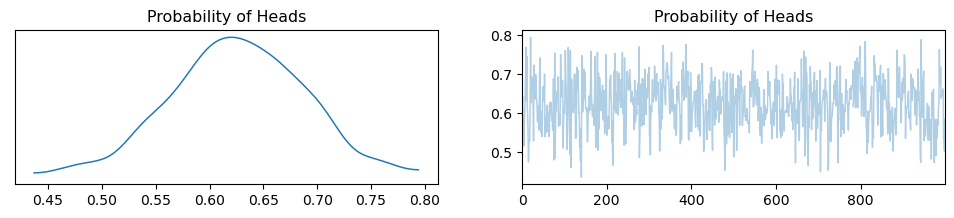

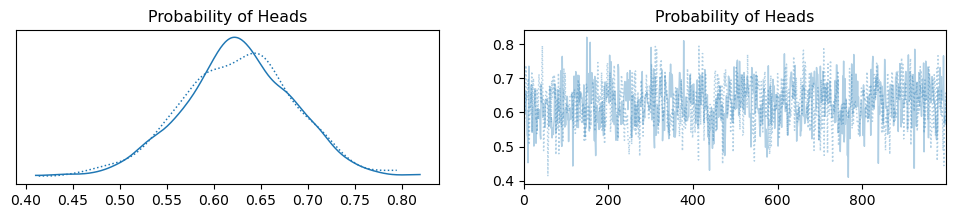

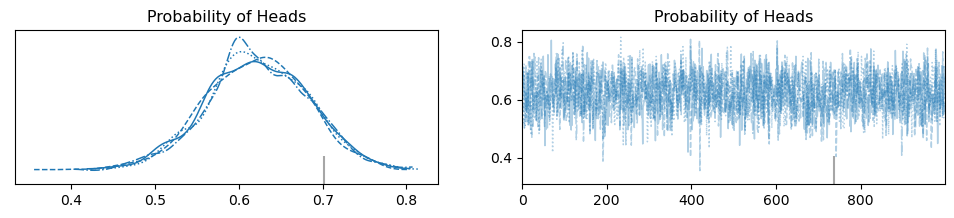

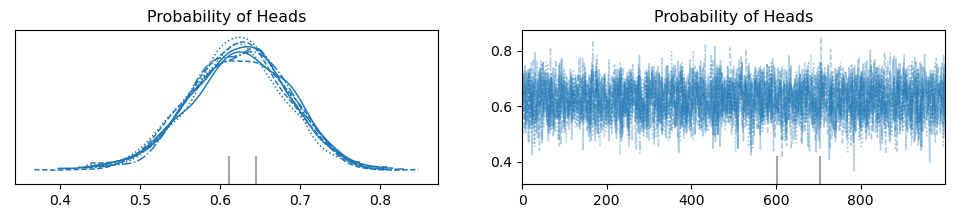

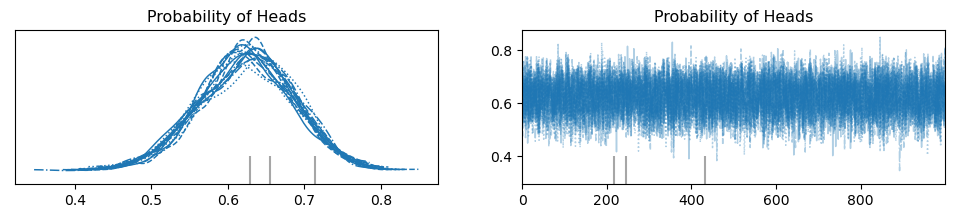

In [153]:
plot_normal_mcmc_heads_posterior(observed_heads, 'chains', CHAINS, 0.8, 0.1)

## Part II: The Lighthouse Problem

We now redo the lighthouse problem of the previous notebook using MCMC for the case where neither the location of the lighthouse along the shore ($x$), nor the distance out to sea is known ($y$).

We also consider the case of an “interloper”, i.e. the case where a lighthouse ship comes nearby the first lighthouse and starts sending out its own light pulses.

Using a uniform prior for $\alpha$ and $\beta$ and a Cauchy distribution for the likelihood function, we can use MCMC to predict the location of the lighthouse in a similar fashion to the previous set. This first example shows the effective of chain length on the distributions.

In [4]:
ALPHA = 1.0
BETA = 1.0
MIN_ALPHA = -5.0
MAX_ALPHA = 5.0
MIN_BETA = 0.0
MAX_BETA = 5.0

SIZES = np.array([1, 10, 100, 1000, 10000])
CHAINS = np.array([1, 2, 4, 8, 16])

STARTING_SIZE = 256

def generate_positions(alpha, beta, size):
    angles = np.random.rand(size)
    angles = 2 * np.pi * angles - np.pi
    positions = beta * np.tan(angles) + alpha
    return positions

observed_positions = generate_positions(ALPHA, BETA, STARTING_SIZE)
print(observed_positions)

[ 3.90692144e-01 -5.81119639e+00  1.42409832e+00 -2.09343203e+00
  9.12528512e-01  7.59324384e-01  9.75188055e-01  7.01867927e-01
 -9.78837518e+00  1.29772504e+01 -1.36933295e+00  4.23138380e-01
 -1.42068280e+00 -8.89456976e-01  1.37284232e+00  2.68523599e+00
  1.26847067e-01  1.82361732e+00  3.66608378e+01  1.50677733e+00
  1.95903247e+00  2.54844867e+00  3.20273306e+00 -1.10489911e+00
 -3.89494371e-01  2.42347783e+00  7.00931147e-01  8.78506027e-01
  1.52159864e+00  4.27887198e-01 -1.10950637e+00  1.50401263e+00
  1.66997977e+00  1.48896035e+00 -2.29501075e+01  1.56879701e+00
  7.14957844e-01  3.77572276e+00  4.95777576e+00  3.95772379e+00
 -2.37150830e+00  1.98166280e+00 -1.46465108e-02 -3.66612758e-01
  8.38404702e+00 -6.46200414e-03  4.59015630e-01  6.76502129e+00
  2.52754399e+00  2.06861663e+00  1.93437604e+00  3.93721812e+00
  2.64512624e+00 -4.98092372e+01  3.73633808e-01 -9.47124822e-02
  1.49126222e+00  5.52714683e+00 -6.97312744e-01  6.46551666e-01
  5.81546808e+00 -1.63507

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 10 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 16 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)




n=1
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  1.049  0.090   0.986    1.112        NaN      NaN       NaN       NaN   
Beta   1.058  0.035   1.033    1.083        NaN      NaN       NaN       NaN   

       r_hat  
Alpha    NaN  
Beta     NaN  


n=10


C:\Users\savar\anaconda3\lib\site-packages\arviz\utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  1.099  0.116   0.868    1.225      0.023    0.016      26.0      22.0   
Beta   1.068  0.085   0.945    1.241      0.018    0.013      20.0      22.0   

       r_hat  
Alpha   1.00  
Beta    1.05  


n=100
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  1.086  0.108   0.860    1.251      0.007    0.005     216.0     131.0   
Beta   1.091  0.094   0.946    1.291      0.006    0.005     224.0     187.0   

       r_hat  
Alpha   0.99  
Beta    1.00  


n=1000
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  1.086  0.099   0.888    1.262      0.002    0.002    1921.0    1483.0   
Beta   1.084  0.092   0.922    1.259      0.002    0.002    1699.0    1232.0   

       r_hat  
Alpha    1.0  
Beta     1.0  


n=10000
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  1.087  0.098   0.908    1.27

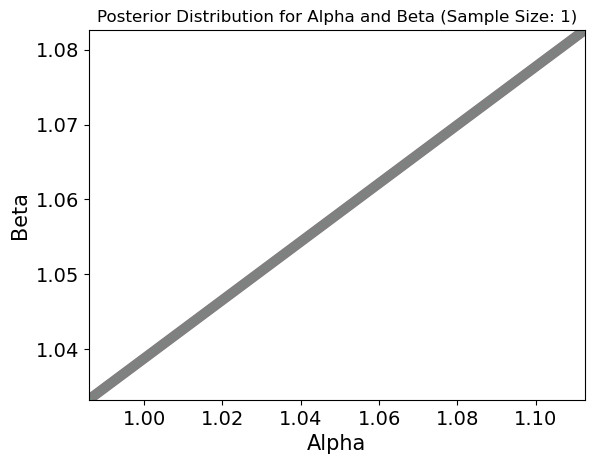

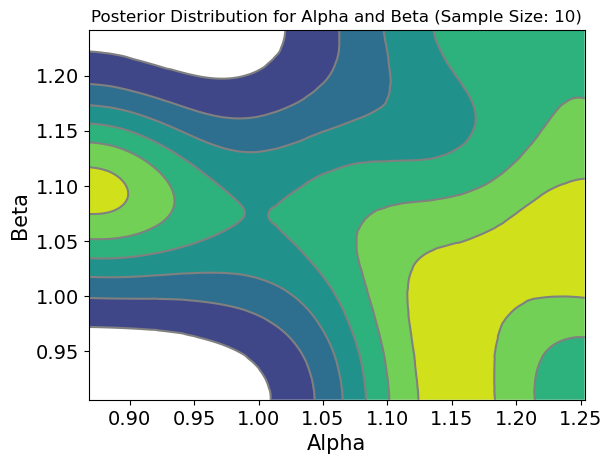

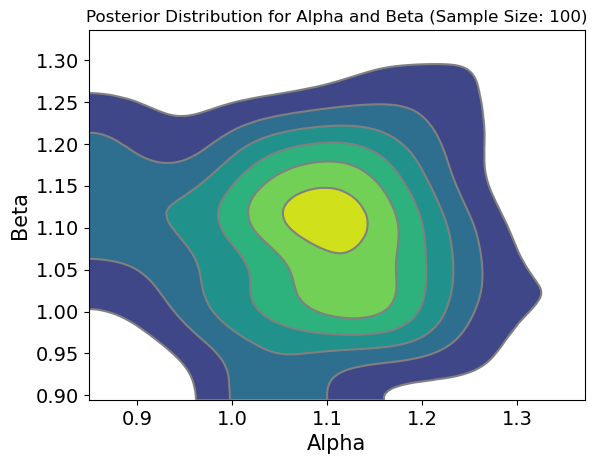

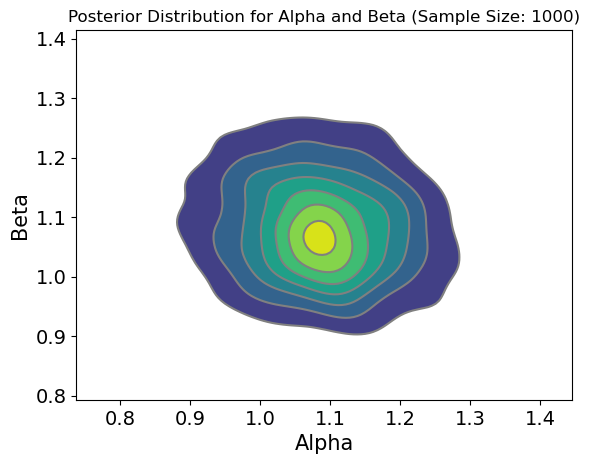

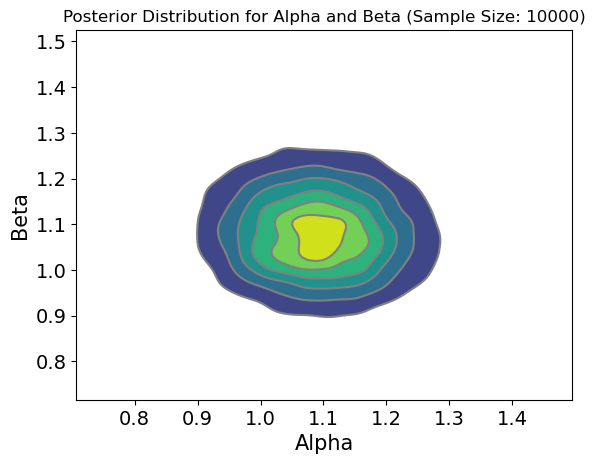

In [5]:
def plot_mcmc_lighthouse_posterior(observed_positions, plot_variable, parameters):
    # Create a PyMC model
    model = pm.Model()
    
    with model:
        # Define uniform prior
        alpha = pm.Uniform('Alpha', lower=MIN_ALPHA, upper=MAX_ALPHA)
        beta = pm.Uniform('Beta', lower=MIN_BETA, upper=MAX_BETA)
            
        # Define bionmial likelihood
        likelihoods = pm.Cauchy('likelihood', alpha=alpha, beta=beta, observed=observed_positions)
        
        traces = []
        
        if plot_variable == 'size':
            for size in parameters:
                traces.append(pm.sample(size, tune=1000, chains=2))
        elif plot_variable == 'chains':
            for chain in parameters:
                traces.append(pm.sample(1000, tune=1000, chains=chain))
    
        for i in range(0, len(parameters)):
            print('\n')
            if plot_variable == 'size':
                print(f'n={parameters[i]}')
                title = f"Posterior Distribution for Alpha and Beta (Sample Size: {parameters[i]})"
                print(pm.summary(traces[i]))
                ax = az.plot_pair(traces[i], var_names=['Alpha', 'Beta'], kind='kde')
                ax.set_title(title)
            elif plot_variable == 'chains':
                print(f'chains={parameters[i]}')
                title = f"Posterior Distribution for Alpha and Beta (Chain Size: {parameters[i]})"
                az.plot_trace(traces[i])
                plt.show()
    
    del model

plot_mcmc_lighthouse_posterior(observed_positions, 'size', SIZES)

We can also show how the distributions change with the number of chains. Since the differences in the number of chains is not clearly visible on a contour plot, the $\alpha$ and $\beta$ distributions are plotted separately so that the different chains can be overlapped.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Alpha, Beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 39 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 78 seconds.




chains=1


C:\Users\savar\anaconda3\lib\site-packages\arviz\utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


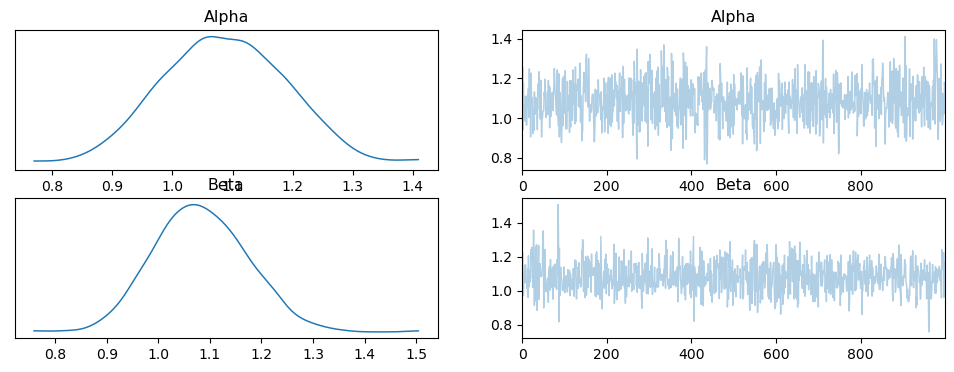



chains=2


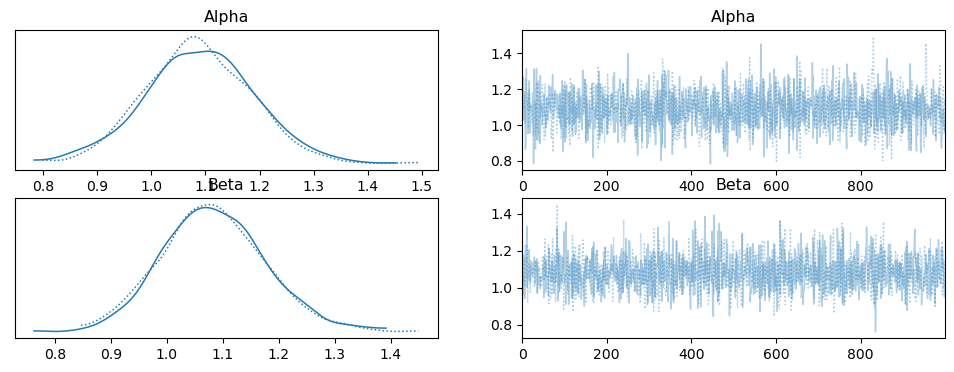



chains=4


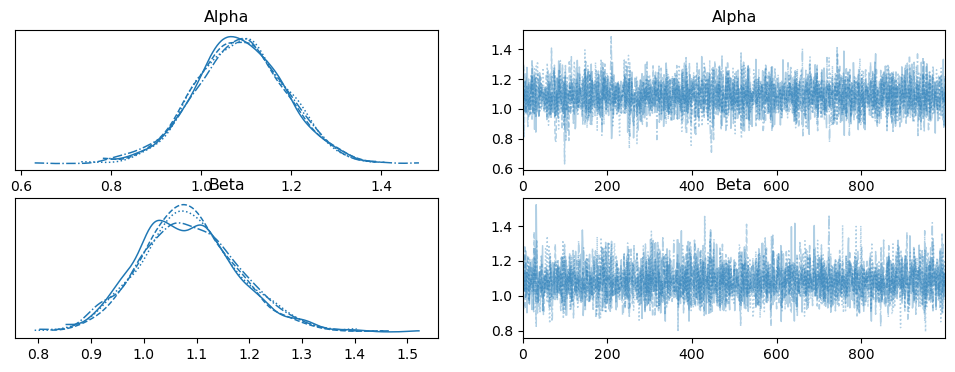



chains=8


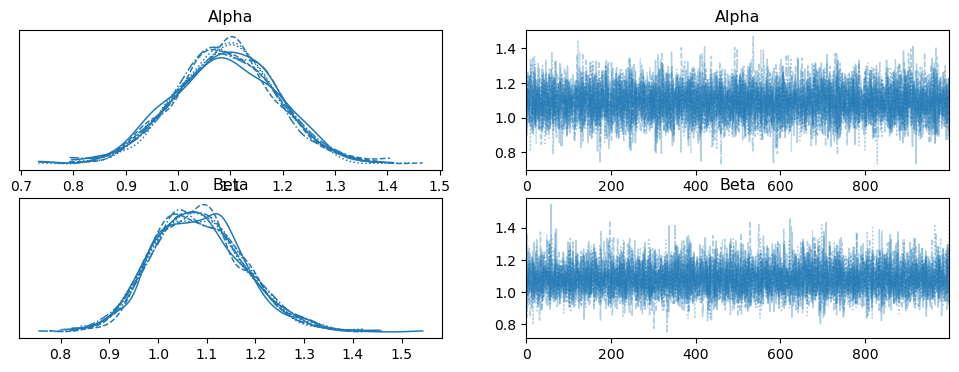



chains=16


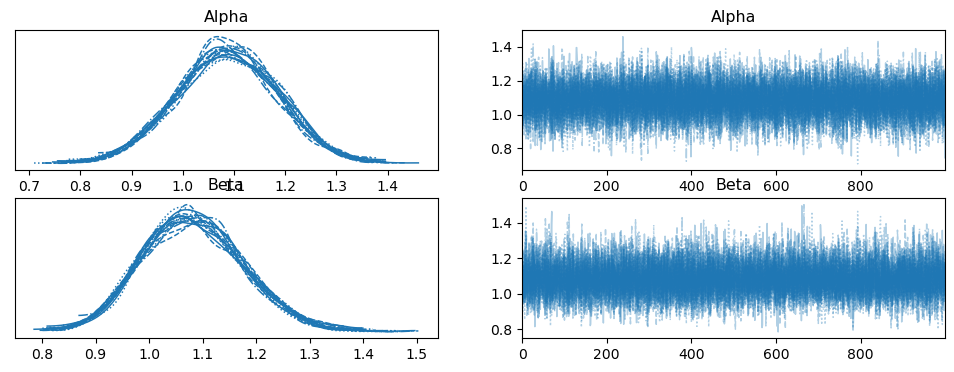

In [6]:
plot_mcmc_lighthouse_posterior(observed_positions, 'chains', CHAINS)

We can now consider the case with an interloper.

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 1 draw iterations (2_000 + 2 draws total) took 10 seconds.
C:\Users\savar\anaconda3\lib\site-packages\arviz\data\base.py:220: UserWarning: More chains (2) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 10 draw iterations (2_000 + 20 draws total) took 10 seconds.
The number of samples is too small to check convergence reliably.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Alpha, Beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
arviz - WARNING - Shape validation failed: input_shape: (2, 1), minimum_shape: (chains=1, draws=4)




n=1
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  0.224  0.031   0.202    0.245        NaN      NaN       NaN       NaN   
Beta   1.743  0.098   1.674    1.813        NaN      NaN       NaN       NaN   

       r_hat  
Alpha    NaN  
Beta     NaN  


n=10
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  0.394  0.098   0.225    0.567      0.024    0.018      15.0      26.0   
Beta   1.749  0.075   1.585    1.825      0.015    0.011      26.0      26.0   

       r_hat  
Alpha   1.14  
Beta    0.95  


n=100
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  0.382  0.101   0.136    0.545      0.007    0.005     193.0     146.0   
Beta   1.751  0.105   1.574    1.957      0.007    0.005     246.0     132.0   

       r_hat  
Alpha   1.00  
Beta    1.01  


n=1000
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Alpha  0.378  0.121   0.133    0

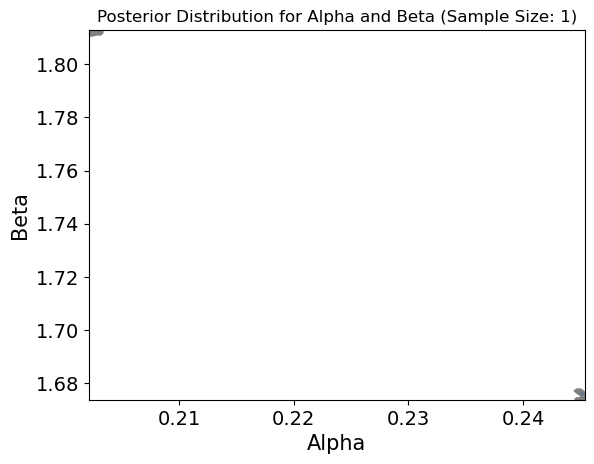

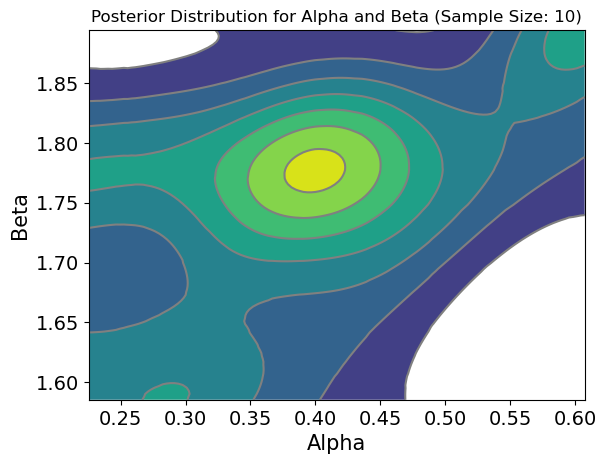

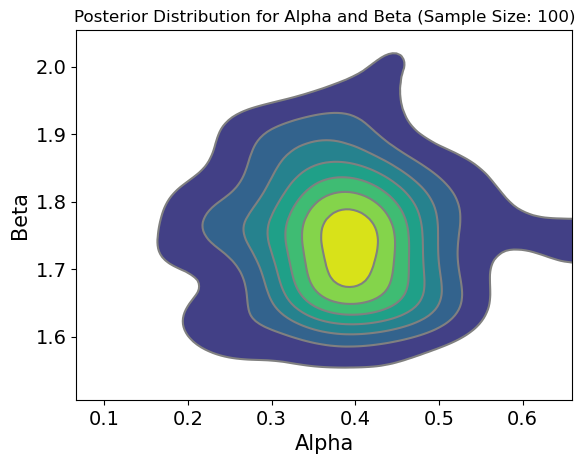

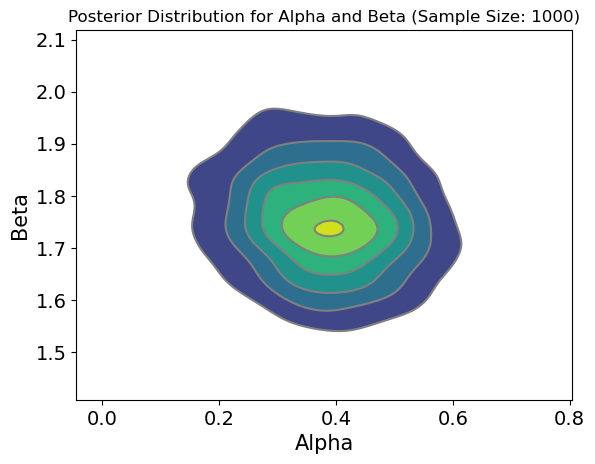

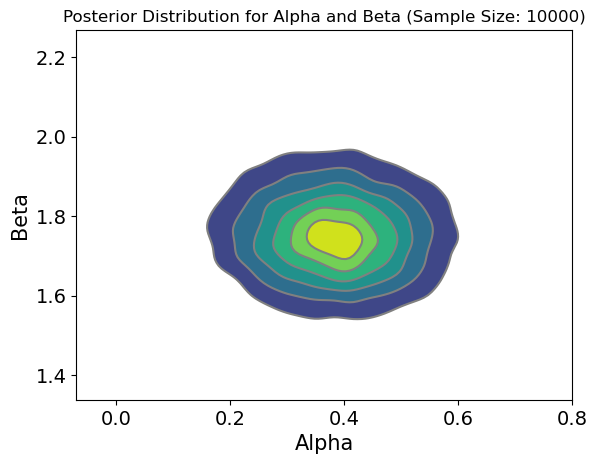

In [7]:
INTER_ALPHA = -1.0
INTER_BETA = 2.0
interloper_positions = generate_positions(INTER_ALPHA, INTER_BETA, int(STARTING_SIZE))
total_positions = np.append(observed_positions, interloper_positions)
plot_mcmc_lighthouse_posterior(total_positions, 'size', SIZES)

As seen above, when the interloper is introduced, the resulting posterior distribution produced by MCMC is not bimodal, and we are therefore unable to isolate the individual locations of the lighthouse and interloper. Instead, a unimodal distribution centered around some point between the lighthouse and the interloper is produced.